### **Modelling Assignment 3 (Group Component)**
Group 17: Raihan Arvi, Parsa Nayyara, Malcolm Maxwell

#### **Prompt**
*Th:*


#### **1. Problem Statement**

To model ...

#### **2. Variables and Parameters** <br>

**Variables**

| Type                  | Description               | Symbol  | Dimension | Unit  |
|-----------------------|---------------------------|---------|-----------|-------|
| Independent variable  | Time                      | $t$       | T         | year  |

</br>

**Parameters**
| Type | Description | Symbol | Dimension | Value    | Unit | Reference |
|------|-------------|--------|-----------|----------|------|-----------|
| Parameter | Concentration of O₂ in the atmosphere | $[O₂]$ | NL⁻³ | &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $8.75 \cdot 10^{-3}$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Molar | 21% of atmospheric gas is O₂[2]. 1 mol ideal gas at RTP is 24 L. For every L air, 0.21 L is O₂, hence 0.00875 M. |

#### **3. Assumptions and Constraints**

*   Greenhouse gasses are absorbed and added at constant rates (i.e. rates does not change over time and are not affected by factors such as changing temperature or pressure)

#### **4. Build Solution**

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("Sleep.csv")
df.head()

,Duration,Quality,Physical_Activity,Stress
0,6.1,6,42,6
1,6.2,6,60,8
2,6.2,6,60,8
3,5.9,4,30,8
4,5.9,4,30,8


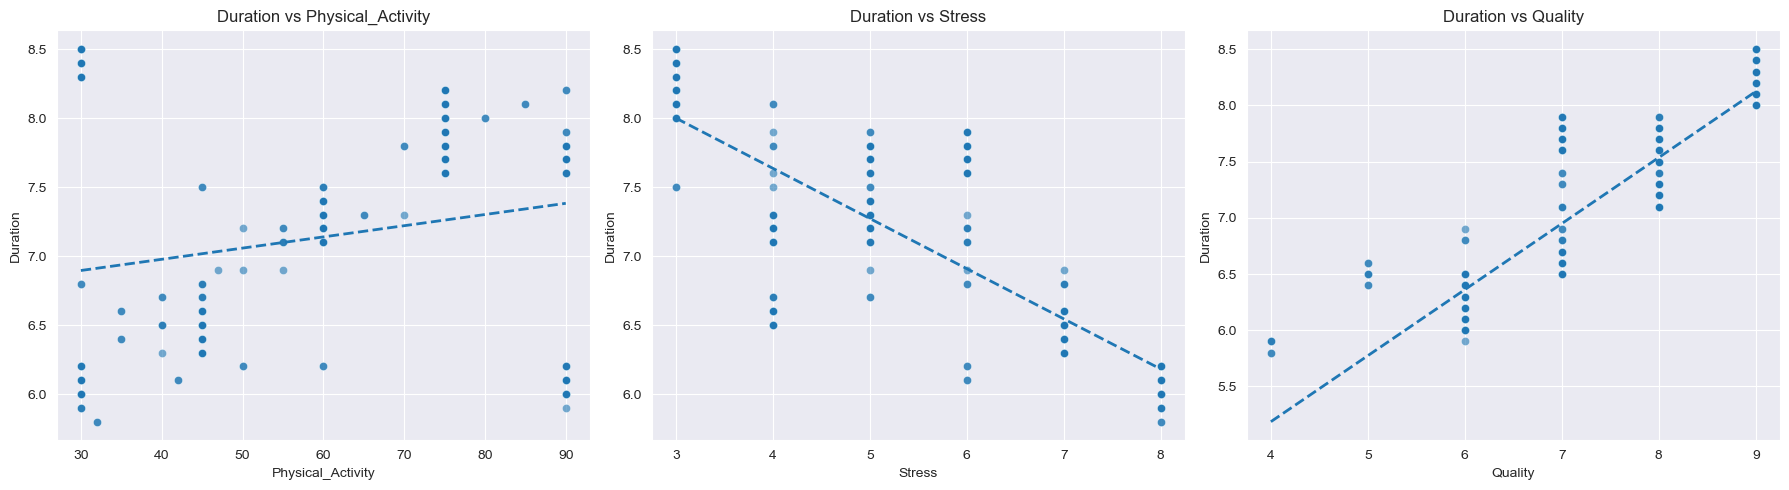

In [5]:
# Duration vs. each predictor
response = "Duration"
predictors = ["Physical_Activity", "Stress", "Quality"]

fig, axes = plt.subplots(1, len(predictors), figsize=(18,5))
for ax, pred in zip(axes, predictors):
    sns.scatterplot(x=df[pred], y=df[response], ax=ax, alpha=0.6)
    sns.regplot(x=df[pred], y=df[response], ax=ax,
                scatter=False, ci=None, line_kws={"lw":2, "ls":"--"})
    ax.set_xlabel(pred)
    ax.set_ylabel(response)
    ax.set_title(f"{response} vs {pred}")
plt.tight_layout()
plt.show()

In [13]:
X = sm.add_constant(df[['Physical_Activity','Stress','Quality']])
Y = df['Duration']
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     450.5
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          4.13e-123
Time:                        01:47:26   Log-Likelihood:                -157.20
No. Observations:                 374   AIC:                             322.4
Df Residuals:                     370   BIC:                             338.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.6737      0.40

In [19]:
# run this cell (assumes df is loaded and pandas/numpy/statsmodels imported)
import numpy as np
import pandas as pd
import statsmodels.api as sm

transform_list = [
    # predictor transforms (replace Stress or Quality in X)
    ("Stress_sqrt",      "predictor", "Stress", lambda s: np.sqrt(s)),
    ("Stress_sq",        "predictor", "Stress", lambda s: s**2),
    ("Quality_log",      "predictor", "Quality", lambda s: np.log(s)),
    ("Quality_sq",       "predictor", "Quality", lambda s: s**2),
    # response transforms (replace Duration with transformed response Y)
    ("Duration_log",     "response",  "Duration", lambda s: np.log(s)),
    ("Duration_sqrt",    "response",  "Duration", lambda s: np.sqrt(s)),
]

results = []
for name, kind, col, func in transform_list:

    temp = df[['Duration','Physical_Activity','Stress','Quality']].copy()

    # apply transformation.
    if func is np.log:
        temp[col] = temp[col].where(temp[col] > 0, np.nan).map(lambda v: np.log(v) if pd.notna(v) else np.nan)
    else:
        # for sqrt of negative numbers numpy gives nan; keep that behavior
        temp[col] = func(temp[col].astype(float))
    # drop rows with NA in any of the model columns
    temp = temp.dropna(subset=['Duration','Physical_Activity','Stress','Quality'])

    # Build X and Y using the exact requested structure
    X_t = sm.add_constant(temp[['Physical_Activity','Stress','Quality']])
    if kind == "response":
        Y_t = temp['Duration'] if col != 'Duration' else temp['Duration']  # placeholder, but we set below
    # set Y_t properly when response transform
    if kind == "response":
        Y_t = temp[col]   # transformed Duration
    else:
        Y_t = temp['Duration']  # original response

    # fit and record adj. R^2
    m = sm.OLS(Y_t, X_t).fit()
    results.append((name, len(temp), m.rsquared_adj))

# summary table sorted by adj R2
res_df = pd.DataFrame(results, columns=['transformation','n_obs','adj_R2']).sort_values('adj_R2', ascending=False)
print("\n\n=== Summary (ranked by adj. R^2) ===")
display(res_df.reset_index(drop=True))



=== Summary (ranked by adj. R^2) ===


,transformation,n_obs,adj_R2
0,Quality_sq,374,0.795499
1,Duration_log,374,0.789244
2,Duration_sqrt,374,0.786617
3,Stress_sq,374,0.786230
4,Stress_sqrt,374,0.782382
5,Quality_log,374,0.761036


In [23]:
# prepare a working copy and create transforms
temp = df[['Duration','Physical_Activity','Stress','Quality']].copy()
temp['Quality_sq'] = temp['Quality'].astype(float) ** 2
# log of Duration (requires Duration > 0)
temp['log_Duration'] = np.log(temp['Duration'].astype(float))

X = sm.add_constant(temp[['Physical_Activity','Stress','Quality_sq']])
Y = temp['log_Duration']

model = sm.OLS(Y, X).fit()
print(model.summary())

print(f"\nAdjusted R^2: {model.rsquared_adj:.5f}")

                            OLS Regression Results                            
Dep. Variable:           log_Duration   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     489.6
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          2.07e-128
Time:                        01:58:31   Log-Likelihood:                 587.63
No. Observations:                 374   AIC:                            -1167.
Df Residuals:                     370   BIC:                            -1152.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.7052      0.03

#### **5. Discussion & Analysis**

As